In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [167]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [168]:
print(df_train.shape)
print(df_test.shape)

(4209, 378)
(4209, 377)


In [169]:
y_train=df_train['y']

In [170]:
x_train = df_train.iloc[:,2:]
x_test = df_test.iloc[:,1:]

In [171]:
print(x_train.isnull().sum())
print(x_train.isnull().sum())

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64
X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64


<AxesSubplot:>

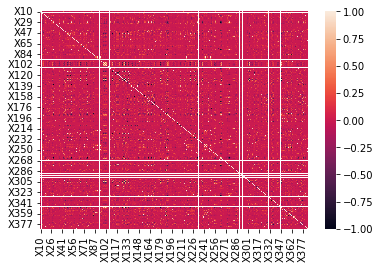

In [173]:
sns.heatmap(x_train.corr())

In [174]:
label_encode=LabelEncoder()

In [175]:
for column in x_train.columns:
    car=len(np.unique(x_train[column]))
    if car==1:
        x_train.drop(columns=column,axis=1,inplace=True)
        x_test.drop(columns=column,axis=1,inplace=True)
    

In [176]:
for column in x_train.columns:
    if x_train[column].dtype=='object':
        x_train[column]=label_encode.fit_transform(x_train[column])
    if x_test[column].dtype=='object':
        x_test[column]=label_encode.fit_transform(x_test[column])

In [177]:
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(x_train)
pca2_results_test = pca.transform(x_test)

In [179]:
x_train,x_test,y_train,y_test=train_test_split(pca2_results_train, 
        y_train, test_size=0.2, random_state=4242)

In [180]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_test, label=y_test)
d_test = xgb.DMatrix(pca2_results_test)


In [188]:
clf = xgb.train(params, d_train, 1000, watchlist,early_stopping_rounds=50, maximize=True, verbose_eval=2)

[14:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.10067	valid-rmse:98.20705
[2]	train-rmse:95.13469	valid-rmse:94.22033
[4]	train-rmse:91.34782	valid-rmse:90.42004
[6]	train-rmse:87.74274	valid-rmse:86.80012
[8]	train-rmse:84.28243	valid-rmse:83.32793
[10]	train-rmse:80.96443	valid-rmse:79.99529
[12]	train-rmse:77.76511	valid-rmse:76.77512
[14]	train-rmse:74.71420	valid-rmse:73.71337
[16]	train-rmse:71.79444	valid-rmse:70.78060
[18]	train-rmse:68.99268	valid-rmse:67.96237
[20]	train-rmse:66.32028	valid-rmse:65.27888
[22]	train-rmse:63.75277	valid-rmse:62.69956
[24]	train-rmse:61.29380	valid-rmse:60.23108
[26]	train-rmse:58.92120	valid-rmse:57.84382
[28]	train-rmse:56.65028	valid-rmse:55.56233
[30]	train-rmse:54.46957	valid-rmse:53.37371
[32]	train-rmse:52.38816	valid-rmse:51.28617
[34]	train-rmse:50.47804	valid-rmse:49.36633
[36]	train-rmse:48

In [183]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test

sub.head()

,ID,y
0,1,49.993309
1,2,61.926971
2,3,49.993309
3,4,49.993309
4,5,69.703972
